In [1]:
%run ./Functions_PM.ipynb

# m_1 = 10
# m_2 = 10
# R_S = 2*(m_1 + m_2)
# x_1 = np.array([-100., -10.])
# x_2 = np.array([0.,      0.])
# v_1 = np.array([0.,    0.07])
# v_2 = np.array([0.,      0.])

m_1 = M_sun
m_2 = 2*M_sun
R_S = 2*(m_1 + m_2)*G/c**2
x_1 = np.array([-1000., 10.])*R_S
x_2 = np.array([0.,      0.])*R_S
v_1 = np.array([0.01,     0.01 ])*c
v_2 = np.array([0.,      0.])*c

s = x_1, x_2, v_1, v_2, m_1, m_2

In [6]:
t_max = 1e6*R_S/c
dt = t_max/1e7
pos1, pos2, pos_CM = run_model(s, t_max = t_max, dt = dt, mode = 'PM')

PMData1 = np.array([pos1[0][0:-1:100], pos1[1][0:-1:100], pos2[0][0:-1:100], pos2[1][0:-1:100], pos_CM[0][0:-1:100], pos_CM[1][0:-1:100]])
np.savetxt("PMData1.csv", PMData1, delimiter=",")

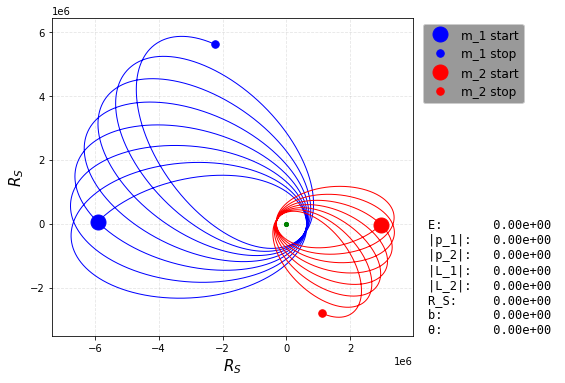

In [7]:

M = slice(0, int(len(pos1[0])), 1)
orbPlotter(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = True)

# lim = 1e7
# lims = (-lim, lim)
# orbPlotter_lims(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True, DL = True, xlim=lims, ylim=lims)